In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [2]:
d = pd.read_csv("data/houses.csv")
d.head()

,area,value
0,57.02,202970
1,96.07,312626
2,93.18,264921
3,91.05,272091
4,69.76,209846


Text(0,0.5,'house value in USD')

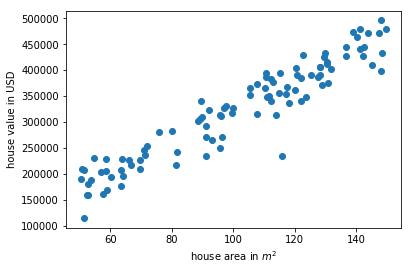

In [3]:
plt.scatter(d.area, d.value)
plt.xlabel("house area in $m^2$")
plt.ylabel("house value in USD")

**ASUMIMOS** que la relación entre el área ($y$) y el valor ($x_1$) es lineal, para la casa $i$:

$$y^{(i)} = \theta_0 + \theta_1 x_1^{(i)}$$

si establecemos que $x_0^{(i)}=1$ para todas las casas, entonces podemos escribir la expresión anterior de forma vectorial, con $\theta = [\theta_0, \theta_1]$ y $\mathbf{x}=[x_0, x_1]$

$$y^{(i)} = \theta\mathbf{x}^{(i)}$$

queremos encontrar los valores $\theta_{min}$ que parametrizan una recta de modo que

$$ J(\theta) =  \sum_{i=0}^{m-1} (\mathbf{x}\theta^{(i)}-y^{(i)})^2$$

$$\theta_{min} = \underset{\theta}{arg\,min} \,\,\,J(\theta)$$ 

en modo matricial

$$J(\theta) = sum(\mathbf{X}\theta-\mathbf{y})^2$$

P.ej., los parámetros $\theta_0=0$, $\theta_1=3800$ definen una recta que es mejorable respecto a los datos que tenemos. Observa como creamos las matrices $X$ e $y$, añadiendo una columna de unos a la matrix $X$

In [41]:
%timeit A = np.c_[np.ones(len(d)), d.area.values]
%timeit B = np.hstack((np.ones((len(d),1)), d[["area"]].as_matrix()))
np.array_equal(A, B)

The slowest run took 5.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.7 µs per loop


/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:257: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


1000 loops, best of 3: 392 µs per loop


True

(100, 2) (100,)


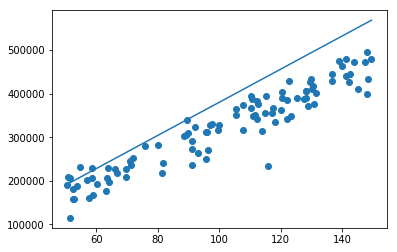

In [44]:
X = np.c_[np.ones(len(d)), d.area.values]
y = d.value.values
print X.shape, y.shape

t = np.array([0,3800])

xg = np.vstack((np.ones(100), np.linspace(np.min(d.area), np.max(d.area),100))).T
plt.scatter(d.area, d.value)
plt.plot(xg[:,1], xg.dot(t))

Una primera aproximación para obtener la recta con los parámetros $\theta_{min}$ según definido anteriormente es usando optimización _caja negra_. 

In [57]:
def cost(t):
    return np.sum((X.dot(t)-y)**2)

In [58]:
%timeit r = minimize(cost, [0,0], method="BFGS")
print r

[0. 0.]
[1.49011612e-08 0.00000000e+00]
[0.00000000e+00 1.49011612e-08]
[0. 0.]
[0.00921791 1.00995793]
[0.00921791 1.00995793]
[0.00921792 1.00995793]
[0.00921791 1.00995795]
[0.04608954 5.04978967]
[0.04608954 5.04978967]
[0.04608955 5.04978967]
[0.04608954 5.04978969]
[ 0.19357605 21.20911663]
[ 0.19357605 21.20911663]
[ 0.19357606 21.20911663]
[ 0.19357605 21.20911665]
[ 0.7835221  85.84642446]
[ 0.7835221  85.84642446]
[ 0.78352212 85.84642446]
[ 0.7835221  85.84642448]
[  3.14330631 344.39565579]
[  3.14330631 344.39565579]
[  3.14330632 344.39565579]
[  3.14330631 344.3956558 ]
[-61655.30848169   1645.16385827]
[-61655.30848169   1645.16385827]
[-61655.30848168   1645.16385827]
[-61655.30848169   1645.16385829]
[1144729.15738515   -7887.51004648]
[1144729.15738515   -7887.51004648]
[1144729.15738516   -7887.51004648]
[1144729.15738515   -7887.51004647]
[292887.21388037  -1156.37938658]
[292887.21388037  -1156.37938658]
[292887.21388039  -1156.37938658]
[292887.21388037  -1156.37

[2.04928901e+05 1.85037846e+02]
[2.04928901e+05 1.85037846e+02]
[2.04928901e+05 1.85037846e+02]
[22804.17332867  2954.77979816]
[22804.17332867  2954.77979816]
[22804.17332869  2954.77979816]
[22804.17332867  2954.77979817]
[24744.62596604  2937.29919521]
[24744.62596604  2937.29919521]
[24744.62596606  2937.29919521]
[24744.62596604  2937.29919522]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24826.50280035  2936.54606586]
[24826.50280035  2936.54606586]
[24826.50280036  2936.54606586]
[24826.50280035  2936.54606587]
[24825.90386612  2936.55194394]
[24825.90386612  2936.55194394]
[24825.90386613  2936.55194394]
[24825.90386612  2936.55194396]
[24825.89910265  2936.55199069]
[24825.89910265  2936.55199069]
[24825.89910267  2936.55199069]
[24825.89910265  2936.55199071]
[24825.89806064  2936.55200092]
[24825.89806064  2936.55200092]
[24825.89806065  2936.55200092]
[24825.89806064  2936.55200094]
[24825.8

[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8

[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8

[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8

[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24826.50280035  2936.54606586]
[24826.20042522  2936.54903344]
[24826.04923766  2936.55051723]
[24825.97364388  2936.55125913]
[24825.93584699  2936.55163008]
[24825.91694855  2936.55181555]
[24825.90749933  2936.55190829]
[24825.90277471  2936.55195466]
[24825.90041241  2936.55197784]
[24825.89923126  2936.55198943]
[24825.89864068  2936.55199523]
[24825.89834539  2936.55199813]
[0. 0.]
[1.49011612e-08 0.00000000e+00]
[0.00000000e+00 1.49011612e-08]
[0. 0.]
[0.00921791 1.00995793]
[0.00921791 1.00995793]
[0.00921792 1.00995793]
[0.00921791 1.00995795]
[0.04608954 5.04978967]
[0.04608954 5.04978967]
[0.04608

[24825.89910265  2936.55199071]
[24825.89806064  2936.55200092]
[24825.89806064  2936.55200092]
[24825.89806065  2936.55200092]
[24825.89806064  2936.55200094]
[24825.89805014  2936.55200102]
[24825.89805014  2936.55200102]
[24825.89805015  2936.55200102]
[24825.89805014  2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.8

[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8

[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8

[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.8

[  3.14330631 344.39565579]
[  3.14330632 344.39565579]
[  3.14330631 344.3956558 ]
[-61655.30848169   1645.16385827]
[-61655.30848169   1645.16385827]
[-61655.30848168   1645.16385827]
[-61655.30848169   1645.16385829]
[1144729.15738515   -7887.51004648]
[1144729.15738515   -7887.51004648]
[1144729.15738516   -7887.51004648]
[1144729.15738515   -7887.51004647]
[292887.21388037  -1156.37938658]
[292887.21388037  -1156.37938658]
[292887.21388039  -1156.37938658]
[292887.21388037  -1156.37938657]
[2.04928901e+05 1.85037846e+02]
[2.04928901e+05 1.85037846e+02]
[2.04928901e+05 1.85037846e+02]
[2.04928901e+05 1.85037846e+02]
[22804.17332867  2954.77979816]
[22804.17332867  2954.77979816]
[22804.17332869  2954.77979816]
[22804.17332867  2954.77979817]
[24744.62596604  2937.29919521]
[24744.62596604  2937.29919521]
[24744.62596606  2937.29919521]
[24744.62596604  2937.29919522]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   293

[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.8

[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8

[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8

[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8

[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8

[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8

[1.49011612e-08 0.00000000e+00]
[0.00000000e+00 1.49011612e-08]
[0. 0.]
[0.00921791 1.00995793]
[0.00921791 1.00995793]
[0.00921792 1.00995793]
[0.00921791 1.00995795]
[0.04608954 5.04978967]
[0.04608954 5.04978967]
[0.04608955 5.04978967]
[0.04608954 5.04978969]
[ 0.19357605 21.20911663]
[ 0.19357605 21.20911663]
[ 0.19357606 21.20911663]
[ 0.19357605 21.20911665]
[ 0.7835221  85.84642446]
[ 0.7835221  85.84642446]
[ 0.78352212 85.84642446]
[ 0.7835221  85.84642448]
[  3.14330631 344.39565579]
[  3.14330631 344.39565579]
[  3.14330632 344.39565579]
[  3.14330631 344.3956558 ]
[-61655.30848169   1645.16385827]
[-61655.30848169   1645.16385827]
[-61655.30848168   1645.16385827]
[-61655.30848169   1645.16385829]
[1144729.15738515   -7887.51004648]
[1144729.15738515   -7887.51004648]
[1144729.15738516   -7887.51004648]
[1144729.15738515   -7887.51004647]
[292887.21388037  -1156.37938658]
[292887.21388037  -1156.37938658]
[292887.21388039  -1156.37938658]
[292887.21388037  -1156.37938657]


[24825.89805014  2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.89805012  2936.55200102]
[24825.8980501   2936.55200104]
[24825.8980501   2936.55200102]
[24825.8980501   2936.55200102]
[24825.8

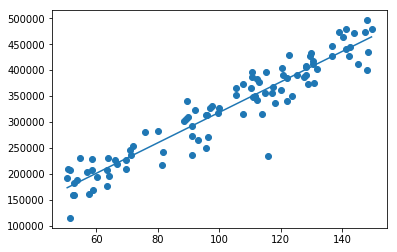

In [8]:
t = r.x
xg = np.vstack((np.ones(100), np.linspace(np.min(d.area), np.max(d.area),100))).T
plt.scatter(d.area, d.value)
plt.plot(xg[:,1], xg.dot(t))

El error de predicción medio que tenemos es de:

In [9]:
np.mean(np.abs(X.dot(t)-y))

22825.52047608339

El gradiente de $J$ es

$$\nabla J= 2X^{T}\cdot(X\cdot\theta-Y)$$

que podemos usar en los procesos de minimización

In [59]:
print X
def grad(t):
    return 2*X.T.dot(X.dot(t)-y)

[[  1.    57.02]
 [  1.    96.07]
 [  1.    93.18]
 [  1.    91.05]
 [  1.    69.76]
 [  1.    99.59]
 [  1.    57.62]
 [  1.   149.57]
 [  1.    81.67]
 [  1.   111.62]
 [  1.   120.63]
 [  1.   120.56]
 [  1.   107.71]
 [  1.    54.74]
 [  1.    60.35]
 [  1.   136.69]
 [  1.    52.6 ]
 [  1.    92.18]
 [  1.    50.69]
 [  1.   130.37]
 [  1.    89.52]
 [  1.    66.79]
 [  1.   143.93]
 [  1.   131.69]
 [  1.    51.52]
 [  1.   140.15]
 [  1.    58.56]
 [  1.   111.03]
 [  1.   115.16]
 [  1.    88.66]
 [  1.    95.69]
 [  1.   112.26]
 [  1.    71.05]
 [  1.    63.35]
 [  1.   128.19]
 [  1.   118.11]
 [  1.    52.39]
 [  1.   136.76]
 [  1.   105.4 ]
 [  1.   123.55]
 [  1.   114.87]
 [  1.    63.62]
 [  1.   114.03]
 [  1.    58.73]
 [  1.   141.21]
 [  1.    95.59]
 [  1.    99.89]
 [  1.    63.76]
 [  1.    96.26]
 [  1.   122.21]
 [  1.    66.09]
 [  1.   115.8 ]
 [  1.    75.78]
 [  1.   138.92]
 [  1.    59.01]
 [  1.   148.56]
 [  1.   128.87]
 [  1.    97.  ]
 [  1.   110.5

In [47]:
%timeit r = minimize(cost, [0,0], jac=grad, method="BFGS")
print r

The slowest run took 5.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 502 µs per loop
      fun: 87173791346.97778
 hess_inv: array([[ 6.23113465e-02, -5.64148580e-04],
       [-5.64148580e-04,  5.55323927e-06]])
      jac: array([2.98023224e-08, 2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([24794.85968752,  2936.83230103])


también podemos obtener el gradiente usando sympy

In [12]:
import sympy
sympy.init_printing(use_latex=True)

In [13]:
t0, t1, i = sympy.symbols("theta_0 theta_1 i")
t0,t1

fíjate en la expresión que obtenemos con un número reducido de datos y cómo la simplifica sympy

In [14]:
expr = 0
for i in range(10):
    expr += (X[i,0]*t0+X[i,1]*t1-y[i])**2
expr = expr/len(X)
expr

In [15]:
print y[:10]
X[:10]

[202970 312626 264921 272091 209846 317444 161472 478948 241927 350402]


array([[  1.  ,  57.02],
       [  1.  ,  96.07],
       [  1.  ,  93.18],
       [  1.  ,  91.05],
       [  1.  ,  69.76],
       [  1.  ,  99.59],
       [  1.  ,  57.62],
       [  1.  , 149.57],
       [  1.  ,  81.67],
       [  1.  , 111.62]])

In [16]:
expr = expr.simplify()
expr

obtenemos la expresion del coste para todos los datos y las derivadas parciales para el gradiente

In [17]:
expr_cost = 0
for i in range(len(X)):
    expr_cost += (X[i,0]*t0+X[i,1]*t1-y[i])**2
expr_cost = expr_cost.simplify()
expr_cost

In [18]:
expr_dt0 = expr_cost.diff(t0)
expr_dt1 = expr_cost.diff(t1)
expr_dt0, expr_dt1

y la función de coste y el jacobiano evaluable en Python

In [54]:
s_cost = sympy.lambdify([[t0,t1]], expr_cost, "numpy")

d0 = sympy.lambdify([[t0,t1]], expr_dt0, "numpy")
d1 = sympy.lambdify([[t0,t1]], expr_dt1, "numpy")
s_grad = lambda x: np.array([d0(x), d1(x)])

y ahora los usamos en el minimizador

In [55]:
%timeit r = minimize(s_cost, [0,0], jac=s_grad, method="BFGS")
print r

1000 loops, best of 3: 815 µs per loop
      fun: 87173791346.97778
 hess_inv: array([[ 6.23113465e-02, -5.64148580e-04],
       [-5.64148580e-04,  5.55323927e-06]])
      jac: array([2.98023224e-08, 2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([24794.85968752,  2936.83230103])


fíjate como las funciones son las mismas

In [21]:
t = np.array([np.random.random()*5000+20000, np.random.random()*1000+20000])
print "theta:",t
print "cost analytic:", cost(t)
print "cost symbolic:", s_cost(t)

print "gradient analytic:", grad(t)
print "gradient symbolic:", s_grad(t)

theta: [23155.83842387 20711.95705154]
cost analytic: 354019852942815.2
cost symbolic: 354019852942815.2
gradient analytic: [3.60823981e+08 3.98566405e+10]
gradient symbolic: [3.60823981e+08 3.98566405e+10]
